<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [2]:
import pandas as pd

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [5]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [6]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


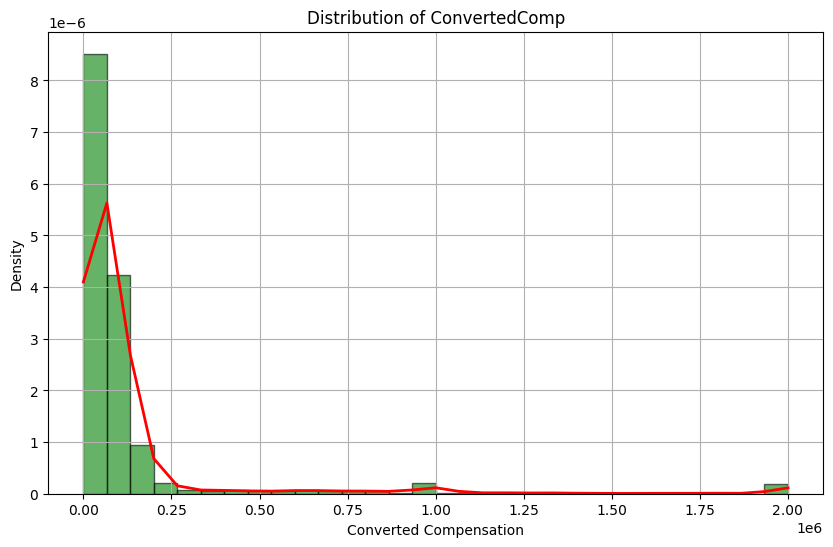

In [15]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the column
    data = df['ConvertedComp'].dropna()

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

    # Plotting the KDE
    kde = gaussian_kde(data)
    plt.plot(bins, kde(bins), linewidth=2, color='r')
    
    plt.title('Distribution of ConvertedComp')
    plt.xlabel('Converted Compensation')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


Plot the histogram for the column `ConvertedComp`.


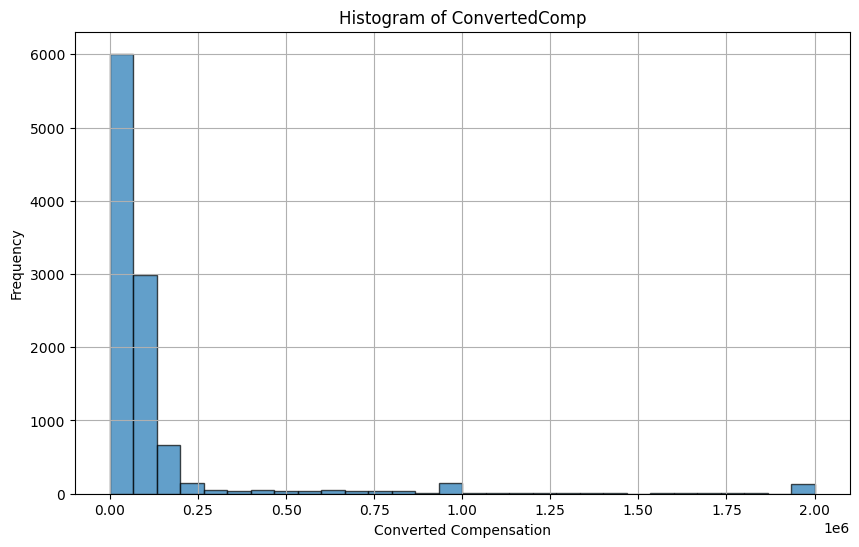

In [13]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df['ConvertedComp'].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of ConvertedComp')
    plt.xlabel('Converted Compensation')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")



What is the median of the column `ConvertedComp`?


In [16]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Calculate the median
    median_converted_comp = df['ConvertedComp'].median()
    print(f"The median of the ConvertedComp column is: {median_converted_comp}")
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [17]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'Gender' in df.columns:
    # Filter the DataFrame for responders who identified only as "Man"
    man_count = df[df['Gender'] == 'Man'].shape[0]
    print(f"The number of responders who identified themselves only as a Man is: {man_count}")
else:
    print("The column 'Gender' does not exist in the DataFrame.")


The number of responders who identified themselves only as a Man is: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [18]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the columns exist
if 'Gender' in df.columns and 'ConvertedComp' in df.columns:
    # Filter the DataFrame for responders who identified only as "Woman"
    women_df = df[df['Gender'] == 'Woman']
    
    # Calculate the median of ConvertedComp for these responders
    median_converted_comp_woman = women_df['ConvertedComp'].median()
    
    print(f"The median ConvertedComp of responders who identified themselves only as a Woman is: {median_converted_comp_woman}")
else:
    print("The required columns 'Gender' and/or 'ConvertedComp' do not exist in the DataFrame.")


The median ConvertedComp of responders who identified themselves only as a Woman is: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [19]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'Age' in df.columns:
    # Drop NaN values from the 'Age' column
    age_data = df['Age'].dropna()
    
    # Calculate the five-number summary
    minimum = age_data.min()
    first_quartile = age_data.quantile(0.25)
    median = age_data.median()
    third_quartile = age_data.quantile(0.75)
    maximum = age_data.max()
    
    print(f"Five-number summary for the column 'Age':")
    print(f"Minimum: {minimum}")
    print(f"First Quartile (Q1): {first_quartile}")
    print(f"Median: {median}")
    print(f"Third Quartile (Q3): {third_quartile}")
    print(f"Maximum: {maximum}")
else:
    print("The column 'Age' does not exist in the DataFrame.")


Five-number summary for the column 'Age':
Minimum: 16.0
First Quartile (Q1): 25.0
Median: 29.0
Third Quartile (Q3): 35.0
Maximum: 99.0


Plot a histogram of the column `Age`.


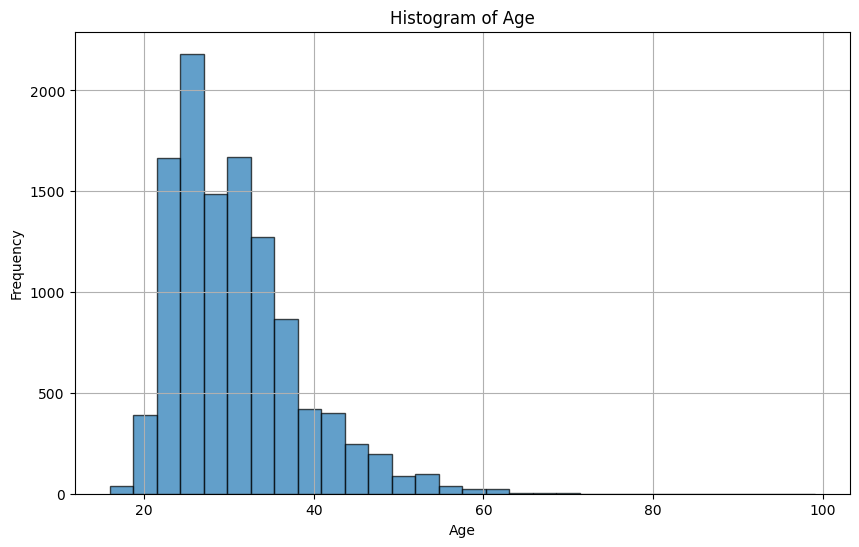

In [20]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'Age' in df.columns:
    # Drop NaN values from the 'Age' column
    age_data = df['Age'].dropna()
    
    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(age_data, bins=30, edgecolor='k', alpha=0.7)
    plt.title('Histogram of Age')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
else:
    print("The column 'Age' does not exist in the DataFrame.")


## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


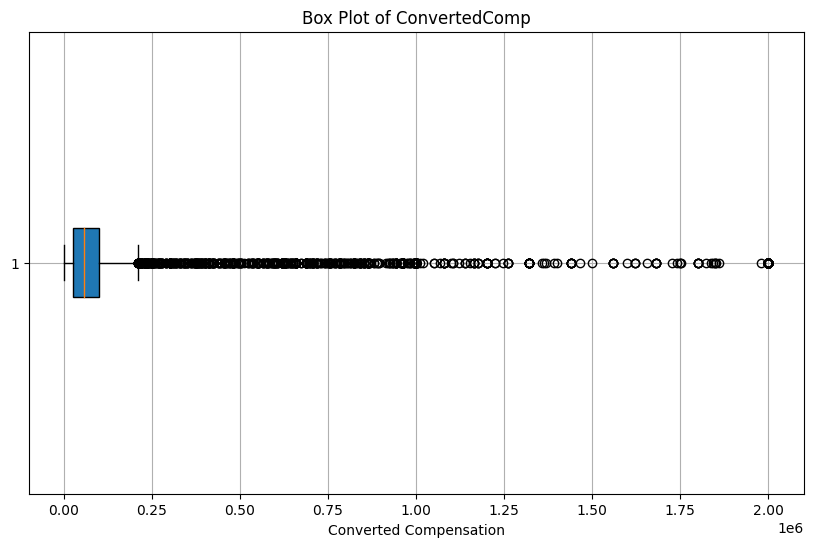

In [21]:
# your code goes here
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the 'ConvertedComp' column
    converted_comp_data = df['ConvertedComp'].dropna()
    
    # Plotting the box plot
    plt.figure(figsize=(10, 6))
    plt.boxplot(converted_comp_data, vert=False, patch_artist=True)
    plt.title('Box Plot of ConvertedComp')
    plt.xlabel('Converted Compensation')
    plt.grid(True)
    plt.show()
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [22]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the 'ConvertedComp' column
    converted_comp_data = df['ConvertedComp'].dropna()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = converted_comp_data.quantile(0.25)
    Q3 = converted_comp_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    print(f"The Interquartile Range (IQR) for the 'ConvertedComp' column is: {IQR}")
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


The Interquartile Range (IQR) for the 'ConvertedComp' column is: 73132.0


Find out the upper and lower bounds.


In [23]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the 'ConvertedComp' column
    converted_comp_data = df['ConvertedComp'].dropna()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = converted_comp_data.quantile(0.25)
    Q3 = converted_comp_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    print(f"Lower Bound for outliers: {lower_bound}")
    print(f"Upper Bound for outliers: {upper_bound}")
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


Lower Bound for outliers: -82830.0
Upper Bound for outliers: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [25]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the 'ConvertedComp' column
    converted_comp_data = df['ConvertedComp'].dropna()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = converted_comp_data.quantile(0.25)
    Q3 = converted_comp_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = converted_comp_data[(converted_comp_data < lower_bound) | (converted_comp_data > upper_bound)]
    
    # Count the number of outliers
    num_outliers = outliers.shape[0]
    
    print(f"The number of outliers in the 'ConvertedComp' column is: {num_outliers}")
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


The number of outliers in the 'ConvertedComp' column is: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [26]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column exists
if 'ConvertedComp' in df.columns:
    # Drop NaN values from the 'ConvertedComp' column
    converted_comp_data = df['ConvertedComp'].dropna()
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = converted_comp_data.quantile(0.25)
    Q3 = converted_comp_data.quantile(0.75)
    
    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Create a new DataFrame by removing outliers
    df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
    
    print(f"The new DataFrame with outliers removed has {df_no_outliers.shape[0]} rows.")
else:
    print("The column 'ConvertedComp' does not exist in the DataFrame.")


The new DataFrame with outliers removed has 9703 rows.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [27]:
# your code goes here
import pandas as pd

# Assuming df is already defined
file_name = "m2_survey_data.csv"
df = pd.read_csv(file_name)

# Check if the column 'Age' exists and if there are other numerical columns
if 'Age' in df.columns:
    # Select numerical columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # Calculate the correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Extract the correlation of 'Age' with all other numerical columns
    age_correlation = correlation_matrix['Age']
    
    print("Correlation of 'Age' with all other numerical columns:")
    print(age_correlation)
else:
    print("The column 'Age' does not exist in the DataFrame.")


Correlation of 'Age' with all other numerical columns:
Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
